PSDだけでLDAを学習・プロット

次にやること　<br>
重みづけしたLDA係数で被験者非依存予測

# ディレクトリ移動（初回だけ）

In [3]:
# ディレクトリを親ディレクトリに移動する
# c:\Users\panga\Documents\research\drowsiness_detection_independentにいるのを確認

import os
os.chdir('..')
print(os.getcwd())


c:\Users\panga\Documents\research\drowsiness_detection_independent


# データ準備

チャンネル:  Fz
----------------------------------------
標準化しました。
正規化しました。
外れ値除去しました。
----------------------------------------


0it [00:00, ?it/s]

['12', '1']
12-1 をキーに追加しました
['10', '1']
10-1 をキーに追加しました
['8', '1']
8-1 をキーに追加しました
['13', '2']
13-2 をキーに追加しました
['5', '1']
5-1 をキーに追加しました
['1', '1']
1-1 をキーに追加しました
['3', '2']
3-2 をキーに追加しました
['3', '1']


1it [00:00,  1.54it/s]

3-1 をキーに追加しました
['6', '2']
6-2 をキーに追加しました
['6', '1']
6-1 をキーに追加しました
['2', '1']
2-1 をキーに追加しました
['10', '3']
10-3 をキーに追加しました
['8', '3']
8-3 をキーに追加しました
['14', '3']
14-3 をキーに追加しました
['14', '2']
14-2 をキーに追加しました
['11', '2']
11-2 をキーに追加しました
['11', '3']
11-3 をキーに追加しました
['9', '3']
9-3 をキーに追加しました
['5', '3']
5-3 をキーに追加しました
['5', '2']
5-2 をキーに追加しました
['7', '3']
7-3 をキーに追加しました
['1', '3']
1-3 をキーに追加しました
['6', '3']
6-3 をキーに追加しました
['4', '3']


2it [00:01,  1.25it/s]

4-3 をキーに追加しました
['4', '2']
4-2 をキーに追加しました
['2', '2']
2-2 をキーに追加しました
----------------------------------------
ウィンドウ: 13秒, スライド: 1秒でデータのセグメンテーションが完了しました。
----------------------------------------
データがセグメントされた辞書: split_data_dic
ラベルの取り出し例: label = list(split_data_dic["1-1"])
データの取り出し例: data = split_data_dic["1-1"][label]
セグメントされた行列データ形状:  (588, 6656)
----------------------------------------
セグメントされたデータの取り出しが完了しました。
セグメントされたデータの形状:  (588, 6656)


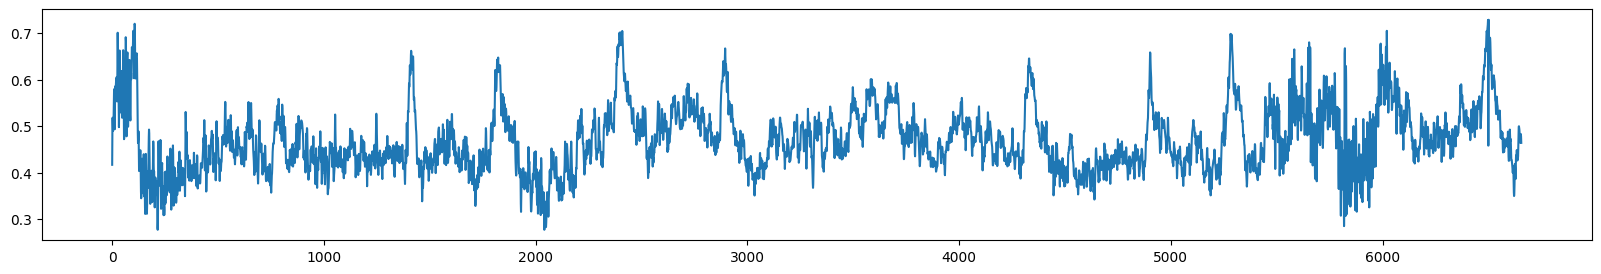

In [4]:

# 辞書データの作成
import sys
sys.path.append('./independent_project')  # ライブラリのファイルがあるディレクトリを追加
import load_data, preprocessing, need_utils
import numpy as np


CHANNEL = "Fz"  # チャンネル名
print("チャンネル: ", CHANNEL)

WINDOW_SEC = 13  # 分割するウィンドウサイズ（秒）
OVER_SEC = 12
SLIDE_SEC = WINDOW_SEC - OVER_SEC  # スライドする時間（秒）

# EMGの有効周波数帯は0-500Hzなのでバンドパスフィルタはかけない
BANDPASS = False  # True: バンドパスフィルタをかける / False: バンドパスフィルタをかけない
FS = 512
LOWCUT = 0.5
HIGHCUT = 70.0

STANDARDIZATION = True
NORMALIZATION = True
REMOVE_OUTLIERS = True

DOWNSAMPLING = False  # True: ダウンサンプリングを行う / False: ダウンサンプリングを行わない
FR = 64
CUTOFF = FR/2


# 適用した前処理の表示
print("----------------------------------------")
if BANDPASS:
    print("バンドパスフィルタ: ", f"{LOWCUT} - {HIGHCUT} Hz")
if STANDARDIZATION:
    print("標準化しました。")
if NORMALIZATION:
    print("正規化しました。")
if REMOVE_OUTLIERS:
    print("外れ値除去しました。")
if DOWNSAMPLING:
    print("ダウンサンプリングしました。")
    print("ダウンサンプリング後のサンプリング周波数: ", FR, "Hz")
print("----------------------------------------")


# 被験者の実験データを辞書に格納
data_dic = load_data.create_dataset_for_independent(CHANNEL, BANDPASS, FS, LOWCUT, HIGHCUT, STANDARDIZATION, NORMALIZATION, REMOVE_OUTLIERS, DOWNSAMPLING, CUTOFF, FR, WINDOW_SEC, OVER_SEC)


# 被験者のデータリスト
subj_list = [
    "1-1", "1-3",
    "2-1", "2-2",
    "3-1", "3-2",
    "4-2", "4-3",
    "5-1", "5-2", "5-3",
    "6-1", "6-2", "6-3",
    "7-3",
    "8-1", "8-3",
    "9-3",
    "10-1", "10-3",
    "11-2", "11-3",
    "12-1",
    "13-2",
    "14-2", "14-3"
]



# 辞書内データのセグメンテーション
split_data_dic = preprocessing.split_data_by_subject(data_dic, WINDOW_SEC, SLIDE_SEC)  # 辞書内のデータを分割
print("----------------------------------------")
print("データがセグメントされた辞書: split_data_dic")
print("ラベルの取り出し例: label = list(split_data_dic[\"1-1\"])")  # ラベルの取り出し例
print("データの取り出し例: data = split_data_dic[\"1-1\"][label]")  # データの取り出し例
print("セグメントされた行列データ形状: ", np.array(list(split_data_dic["1-1"].values())[0]).shape)  # 分割されたデータの形状を表示



# セグメントされたデータの取り出し（例）
segments = need_utils.get_segments_from_split_data(split_data_dic, "1-1")
print("セグメントされたデータの形状: ", segments.shape)  # セグメントされたデータの形状を表示 --> (セグメント数, サンプル数)


import matplotlib.pyplot as plt
plt.figure(figsize=(20, 3))
plt.plot(segments[0])
plt.show()


# Delta, Theta, Alpha, Beta

## 関数

In [ ]:

import sys
sys.path.append('../independent_project')  # ライブラリのファイルがあるディレクトリを追加
import load_data, preprocessing, need_utils

import numpy as np
import scipy.signal as signal
import scipy.stats as stats
import antropy as ant  # 修正: antropyを使用
import zlib  # 代替LZC実装用
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import os


fs = 512  # サンプリング周波数

# --- 2. 複雑性指標の計算 ---
def compute_lzc(signal):
    """Lempel-Ziv Complexity 計算（antropyが利用できれば使用）"""
    binarized = (signal > np.median(signal)).astype(int)  # バイナリ変換
    binary_str = ''.join(map(str, binarized.tolist()))  # 文字列変換
    try:
        return ant.lziv_complexity(binarized, normalize=True)  # 修正: antropyを使用
    except AttributeError:
        return len(zlib.compress(binary_str.encode())) / len(binary_str)  # 代替実装

def compute_pe(signal):
    """Permutation Entropy 計算"""
    return ant.perm_entropy(signal, order=3, normalize=True)

# --- 3. 周波数成分解析 ---
def compute_bandpower(sig, fs, band):
    """指定した周波数帯のバンドパワーを計算"""
    f, Pxx = signal.welch(sig, fs=fs, nperseg=fs*2)
    band_idx = np.logical_and(f >= band[0], f <= band[1])
    return np.trapz(Pxx[band_idx], f[band_idx])


def extract_features(EEG_data):
    bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 12), 'beta': (12, 30)}

    # --- 4. 特徴量抽出 ---
    features = []
    for i in range(EEG_data.shape[0]):  # 各セグメント
        sig = EEG_data[i, :]
        # feature_row = [compute_lzc(sig), compute_pe(sig)]
        feature_row = [compute_pe(sig)]  # LZCはあまり寄与しないので、PEのみ計算
        for band in bands.values():
            feature_row.append(compute_bandpower(sig, fs, band))
        features.append(feature_row)

    features = np.array(features)
    return features


def visualize_LDA(features, labels, subj_experiments):
    # LDAモデルの作成
    lda = LinearDiscriminantAnalysis(n_components=1)  # 2次元に削減
    X_lda = lda.fit_transform(features, labels)  # 特徴量をLDA空間に変換
    print(lda.coef_)

    # 1D ヒストグラムでクラス分離を確認
    plt.figure(figsize=(8, 5))

    # 覚醒クラス (label=0)
    sns.histplot(X_lda[labels == 0, 0], bins=30, kde=True, color="blue", label="Awake", alpha=0.5)

    # 眠気クラス (label=1)
    sns.histplot(X_lda[labels == 1, 0], bins=30, kde=True, color="red", label="Drowsy", alpha=0.5)

    plt.xlabel("LDA Component 1")
    plt.ylabel("Density")
    plt.title(f"Class Separation with LDA ({subj_experiments})")
    # ディレクトリが存在しない場合は作成
    if not os.path.exists("results"):
        os.makedirs("results")
    plt.savefig(f"results/LDA_{subj_experiments}.png")
    print(f"saved: {os.getcwd}/results/LDA_{subj_experiments}.png")
    plt.show()

## 実行

['1-1', '1-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[    98.0615127  -10657.77883898 -23535.12497849   4546.43531893
  -22564.16885469]]


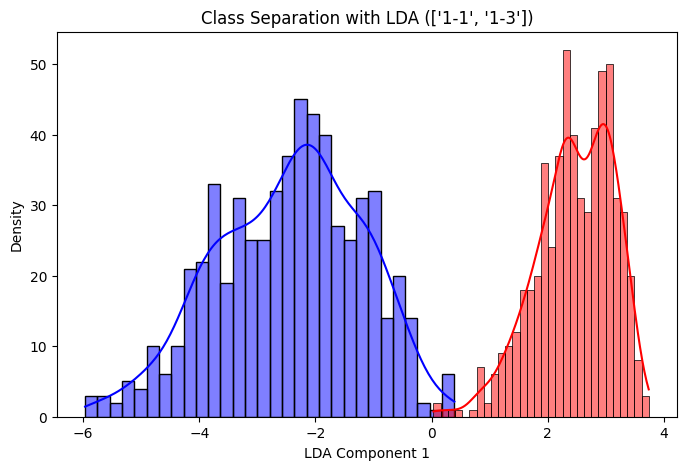

['2-1', '2-2']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[   307.18186906   3551.22200591   3182.14020019 -58669.7179963
   68952.01689162]]


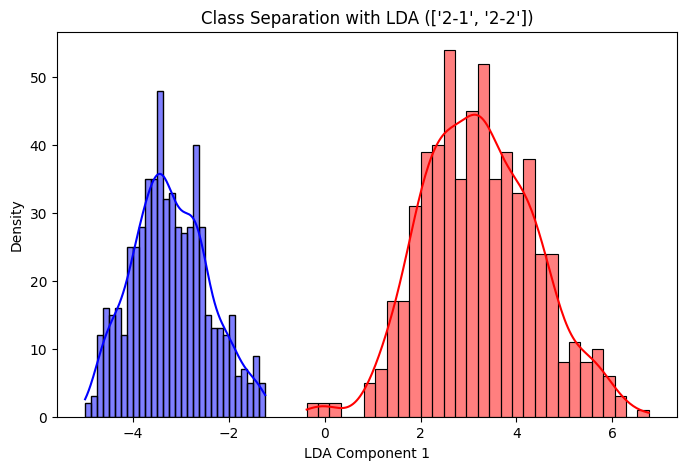

['5-1', '5-2', '5-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[  53.50849389  390.85606385 3934.75038582  391.41323704 -696.68174777]]


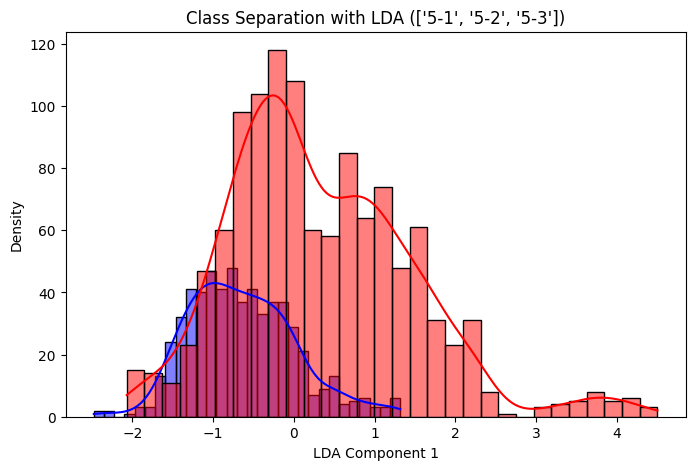

['6-1', '6-2', '6-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[-4.18469729e+01  2.48778709e+03 -5.38504909e+04  2.01620906e+04
  -1.17668281e+04]]


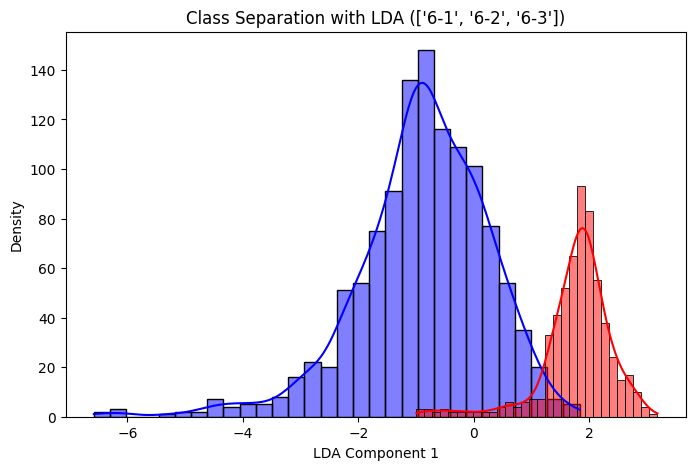

['8-1', '8-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[ 4.06367422e+01  1.04133890e+03  8.62621622e+04 -5.28158596e+04
  -7.09380900e+03]]


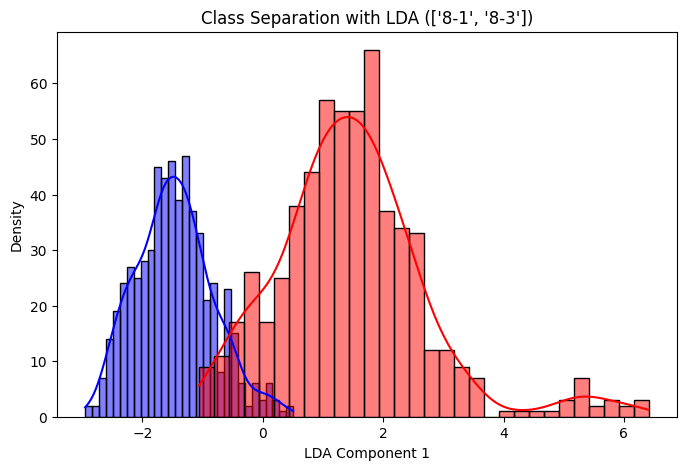

['10-1', '10-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[-5.74826963e+00  2.90800208e+02  5.29277948e+04  1.88904977e+04
   2.57228848e+04]]


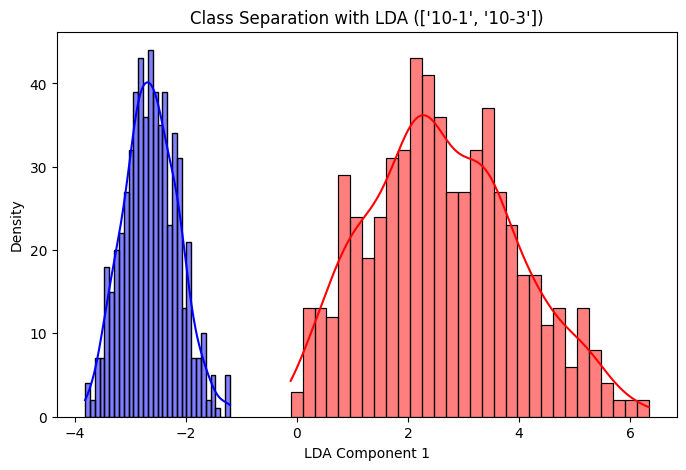

In [8]:

subj_list = [
    ["1-1", "1-3"], 
    ["2-1", "2-2"], 
    # ["3-1", "3-2"],
    # ["4-2", "4-3"],
    ["5-1", "5-2", "5-3"],
    ["6-1", "6-2", "6-3"],
    # ["7-3"],
    ["8-1", "8-3"],
    # ["9-3"],
    ["10-1", "10-3"],
    # ["11-2", "11-3"],
    # ["12-1"],
    # ["13-2"],
    # ["14-2", "14-3"]
]

for experiments in subj_list:
    print(experiments)
    if len(experiments) > 1:
        all_features = []
        all_labels = []
        for subj_experiment in experiments:
            segments = need_utils.get_segments_from_split_data(split_data_dic, subj_experiment)
            label = list(split_data_dic[subj_experiment].keys()) * len(segments)
            # ラベルが一種類だけの場合はsubj_listに戻る
            EEG_data = np.array(segments)
            labels = np.array(label)

            try:
                features = extract_features(EEG_data)
                all_features.append(features)
                all_labels.append(labels)
            except:
                continue
        if len(np.unique(all_labels)) > 1:
            visualize_LDA(np.concatenate(all_features), np.concatenate(all_labels), experiments)

# Theta, Alpha, Beta

## 関数

In [9]:

import sys
sys.path.append('../independent_project')  # ライブラリのファイルがあるディレクトリを追加
import load_data, preprocessing, need_utils

import numpy as np
import scipy.signal as signal
import scipy.stats as stats
import antropy as ant  # 修正: antropyを使用
import zlib  # 代替LZC実装用
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import os


fs = 512  # サンプリング周波数

# --- 2. 複雑性指標の計算 ---
def compute_lzc(signal):
    """Lempel-Ziv Complexity 計算（antropyが利用できれば使用）"""
    binarized = (signal > np.median(signal)).astype(int)  # バイナリ変換
    binary_str = ''.join(map(str, binarized.tolist()))  # 文字列変換
    try:
        return ant.lziv_complexity(binarized, normalize=True)  # 修正: antropyを使用
    except AttributeError:
        return len(zlib.compress(binary_str.encode())) / len(binary_str)  # 代替実装

def compute_pe(signal):
    """Permutation Entropy 計算"""
    return ant.perm_entropy(signal, order=3, normalize=True)

# --- 3. 周波数成分解析 ---
def compute_bandpower(sig, fs, band):
    """指定した周波数帯のバンドパワーを計算"""
    f, Pxx = signal.welch(sig, fs=fs, nperseg=fs*2)
    band_idx = np.logical_and(f >= band[0], f <= band[1])
    return np.trapz(Pxx[band_idx], f[band_idx])


def extract_features(EEG_data):
    # bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 12), 'beta': (12, 30)}
    bands = {'theta': (4, 8), 'alpha': (8, 12), 'beta': (12, 30)}  # Delta帯は寄与が少ないため削除

    # --- 4. 特徴量抽出 ---
    features = []
    for i in range(EEG_data.shape[0]):  # 各セグメント
        sig = EEG_data[i, :]
        # feature_row = [compute_lzc(sig), compute_pe(sig)]
        feature_row = [compute_pe(sig)]  # LZCはあまり寄与しないので、PEのみ計算
        for band in bands.values():
            feature_row.append(compute_bandpower(sig, fs, band))
        features.append(feature_row)

    features = np.array(features)
    return features


def visualize_LDA(features, labels, subj_experiments):
    # LDAモデルの作成
    lda = LinearDiscriminantAnalysis(n_components=1)  # 2次元に削減
    X_lda = lda.fit_transform(features, labels)  # 特徴量をLDA空間に変換
    print(lda.coef_)

    # 1D ヒストグラムでクラス分離を確認
    plt.figure(figsize=(8, 5))

    # 覚醒クラス (label=0)
    sns.histplot(X_lda[labels == 0, 0], bins=30, kde=True, color="blue", label="Awake", alpha=0.5)

    # 眠気クラス (label=1)
    sns.histplot(X_lda[labels == 1, 0], bins=30, kde=True, color="red", label="Drowsy", alpha=0.5)

    plt.xlabel("LDA Component 1")
    plt.ylabel("Density")
    plt.title(f"Class Separation with LDA ({subj_experiments})")
    # ディレクトリが存在しない場合は作成
    if not os.path.exists("results"):
        os.makedirs("results")
    plt.savefig(f"results/LDA_{subj_experiments}.png")
    print(f"saved: {os.getcwd}/results/LDA_{subj_experiments}.png")
    plt.show()

## 実行

['1-1', '1-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[    59.88547676 -26329.18471854   1946.56473629 -52884.53715253]]
saved: <built-in function getcwd>/results/LDA_['1-1', '1-3'].png


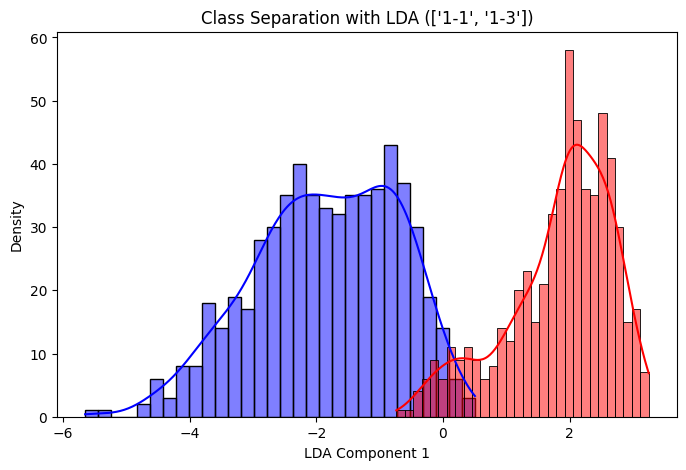

['2-1', '2-2']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[   268.28240914  21401.52819062 -53793.99586536  68312.13500713]]
saved: <built-in function getcwd>/results/LDA_['2-1', '2-2'].png


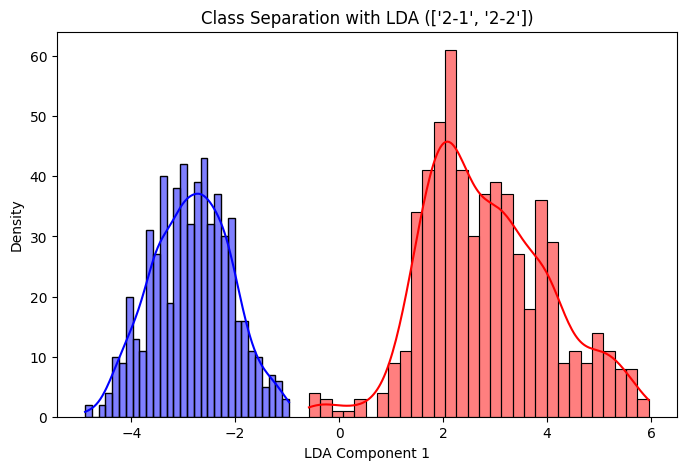

['5-1', '5-2', '5-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[  55.23222804 4132.34871008  248.6614234   -67.28426614]]
saved: <built-in function getcwd>/results/LDA_['5-1', '5-2', '5-3'].png


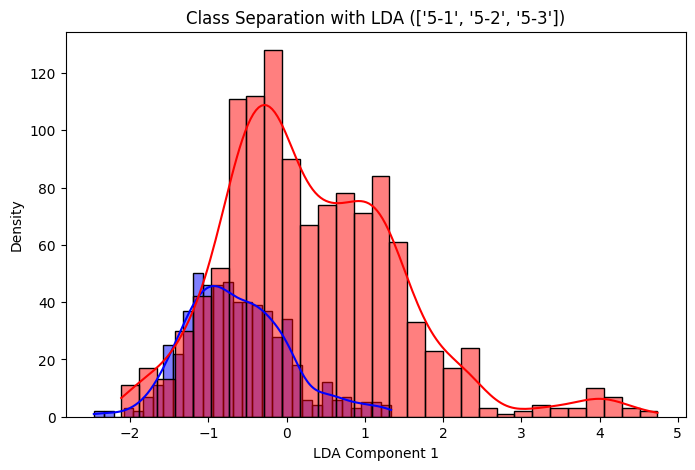

['6-1', '6-2', '6-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[-3.08334961e+01 -4.16468244e+04  2.37629352e+04 -7.53982891e+03]]
saved: <built-in function getcwd>/results/LDA_['6-1', '6-2', '6-3'].png


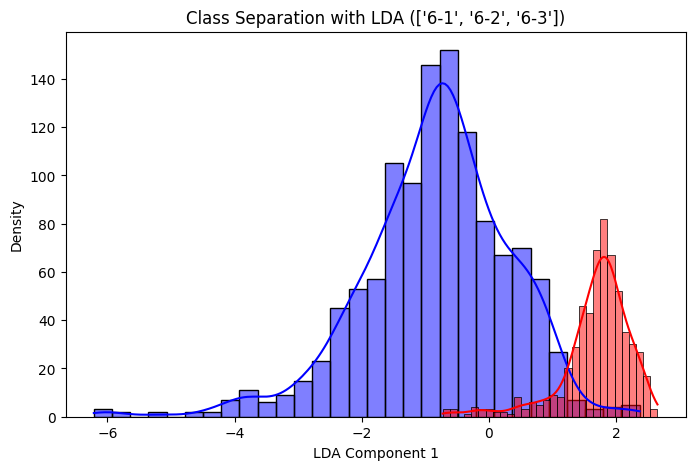

['8-1', '8-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[ 4.04573249e+01  9.09666494e+04 -4.58804671e+04 -5.23750915e+03]]
saved: <built-in function getcwd>/results/LDA_['8-1', '8-3'].png


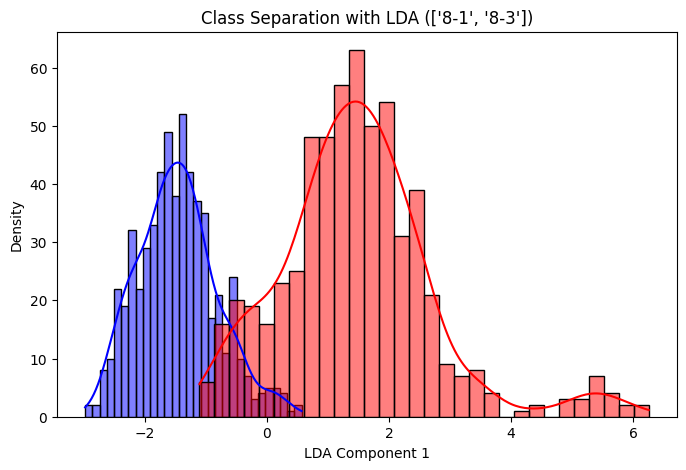

['10-1', '10-3']
----------------------------------------
セグメントされたデータの取り出しが完了しました。
----------------------------------------
セグメントされたデータの取り出しが完了しました。
[[-4.71691267e+00  5.40390222e+04  1.79536544e+04  2.79052487e+04]]
saved: <built-in function getcwd>/results/LDA_['10-1', '10-3'].png


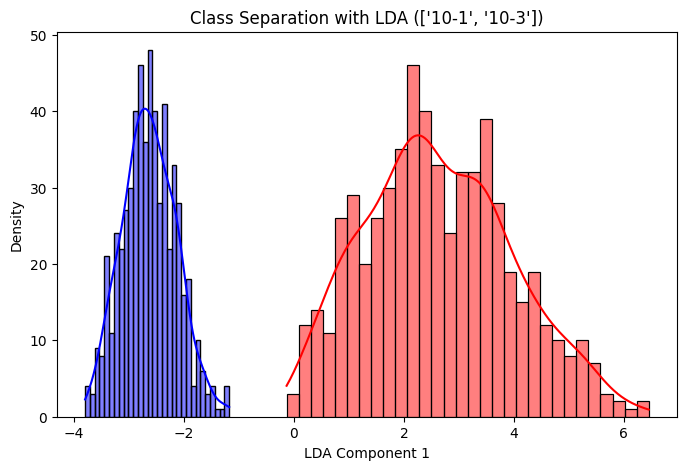

In [10]:


subj_list = [
    ["1-1", "1-3"], 
    ["2-1", "2-2"], 
    # ["3-1", "3-2"],
    # ["4-2", "4-3"],
    ["5-1", "5-2", "5-3"],
    ["6-1", "6-2", "6-3"],
    # ["7-3"],
    ["8-1", "8-3"],
    # ["9-3"],
    ["10-1", "10-3"],
    # ["11-2", "11-3"],
    # ["12-1"],
    # ["13-2"],
    # ["14-2", "14-3"]
]

for experiments in subj_list:
    print(experiments)
    if len(experiments) > 1:
        all_features = []
        all_labels = []
        for subj_experiment in experiments:
            segments = need_utils.get_segments_from_split_data(split_data_dic, subj_experiment)
            label = list(split_data_dic[subj_experiment].keys()) * len(segments)
            # ラベルが一種類だけの場合はsubj_listに戻る
            EEG_data = np.array(segments)
            labels = np.array(label)

            try:
                features = extract_features(EEG_data)
                all_features.append(features)
                all_labels.append(labels)
            except:
                continue
        if len(np.unique(all_labels)) > 1:
            visualize_LDA(np.concatenate(all_features), np.concatenate(all_labels), experiments)